In [1]:


import scipy.io as scio
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

In [2]:
data=scio.loadmat('./Chip1_102400_LowSpeed.mat')
type(data)
data.keys()


dict_keys(['__header__', '__version__', '__globals__', 'GAIN_MIN', 'GAIN_PLUS', 'Vout_N4'])

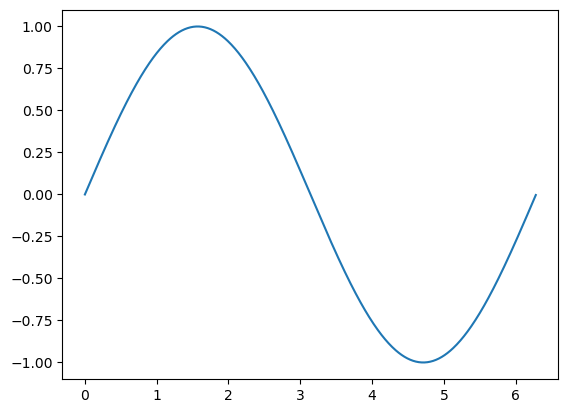

In [3]:
x=np.arange(0,2*np.pi,0.01)
y=np.sin(x)

plt.plot(x,y)
plt.show()

In [4]:
Vout_N4 = np.array(data['Vout_N4'])
GAIN_MIN = np.array(data['GAIN_MIN'])
GAIN_PLUS = np.array(data['GAIN_MIN'])
GAIN = np.mean([GAIN_MIN, GAIN_PLUS])

## Plot Flash Performance

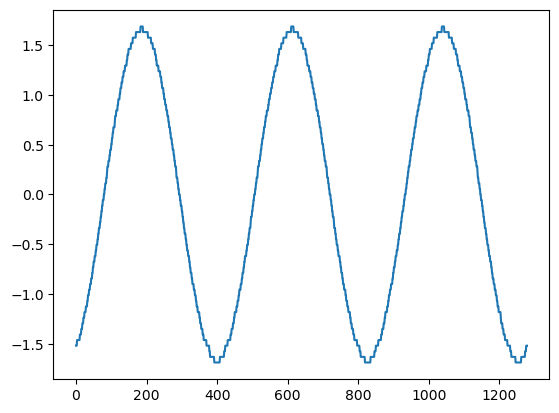

In [5]:
M = 1280
J = 3
N_Sample = len(Vout_N4)
Vref = 1.8

plt.figure()
plt.plot(Vout_N4[0:M-1,0])
plt.show()


In [8]:
Vout_calib = Calib_Gain(Vout_N4, GAIN)

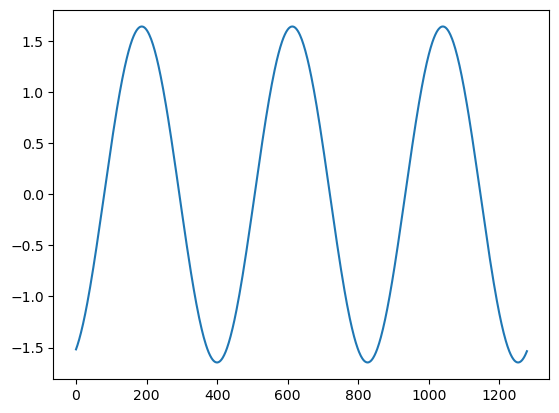

In [9]:
plt.figure()
plt.plot(Vout_calib[0:M-1])
plt.show()

In [45]:
# int(N_Sample / 2)
df, pxx = periodogram(Vout_calib, 2E6, np.kaiser(len(Vout_calib), 38))
len(pxx)

51201

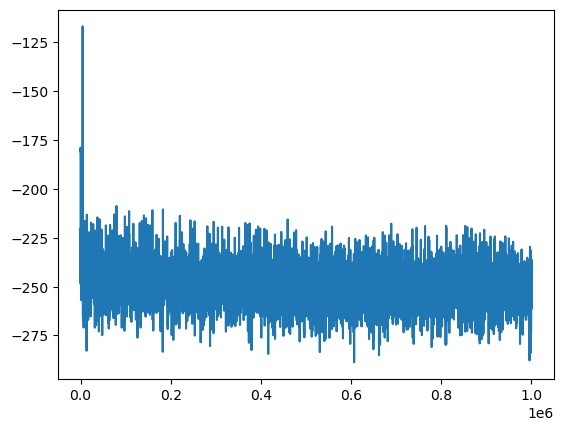

In [46]:
plt.figure()
plt.plot(df, 10*np.log10(pxx))
plt.show()


In [37]:
freq = np.arange(0, N_Sample/2+1) * 2E6/N_Sample

In [44]:

def Calib_Gain(V_uncalib, Gain):
    V_calib = np.zeros(len(V_uncalib))
    for i in range(4):
        V_calib = V_calib + (V_uncalib[:,i] / Gain**(i))
        
    return V_calib

def periodogram(x, Fs, win):
    N = len(x)
    index_tail = int(N/2) + 1
    x_win = x * win
    xft = fft(x_win, N)
    xft = xft[0:index_tail]
    xpsd = 1/(Fs*N) * abs(xft)**2 * (1/(Fs*N)) * np.sqrt(np.sum(win))
    xpsd[1:-2] = 2*xpsd[1:-2]
    freq = np.arange(0, N/2+1) * Fs/N
    return freq, xpsd